In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC
%matplotlib inline

In [3]:
df = pd.read_csv('churn.csv')
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### 1. Построить гистограмму количества звонков в техническую поддержку 

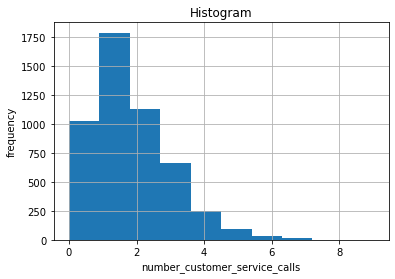

In [36]:
plt.hist(df['number_customer_service_calls'], 10)
plt.grid(True)
plt.title('Histogram')
plt.xlabel('number_customer_service_calls')
plt.ylabel('frequency')
plt.show()

#### 2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международных)

In [30]:
df['all_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']

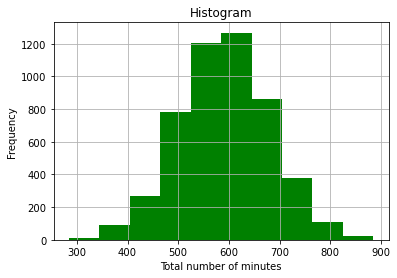

In [37]:
plt.hist(df['all_minutes'], 10, facecolor='g')
plt.grid(True)
plt.title('Histogram')
plt.xlabel('Total number of minutes')
plt.ylabel('Frequency')
plt.show()

#### 3.Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (https://ru.wikipedia.org/wiki/Корреляция) общего количества минут и количества звонков в техподдержку

In [47]:
X = df['all_minutes']
Y = df['number_customer_service_calls']
n = len(X)
m_x = sum(X) / n
m_y = sum(Y) / n
stdev_x = (sum([(i - m_x)**2 for i in X]) / n)**0.5
stdev_y = (sum([(i - m_y)**2 for i in Y]) / n)**0.5
covariance = sum([(X[i] - m_x) * (Y[i] -m_y) for i in range(n)])
pearson_coefficient = covariance / (n * stdev_x * stdev_y)
print(round(pearson_coefficient, 3))

-0.011


##### Проверка:

Коэффициент корреляции Пирсона: -0.011407910827441406


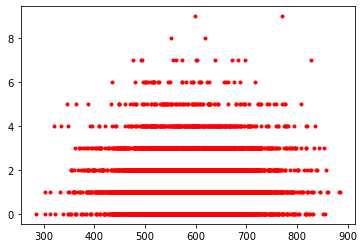

In [85]:
corr, p_value = pearsonr(X, Y)
plt.scatter(X, Y, marker='.', color= 'r')
print('Коэффициент корреляции Пирсона:', corr)

#### 4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента

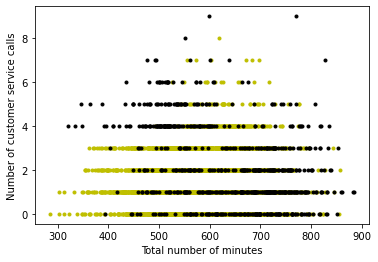

In [89]:
# Клиент остался в компании
x = df[(df.churned == False)]['all_minutes']
y = df[(df.churned == False)]['number_customer_service_calls']
plt.scatter(x, y, marker='.',color='y')
plt.xlabel('Total number of minutes')
plt.ylabel('Number of customer service calls')

# Клиент покинул компанию
x = df[(df.churned == True)]['all_minutes']
y = df[(df.churned == True)]['number_customer_service_calls']
plt.scatter(x, y, marker='.',color='k')
plt.xlabel('Total number of minutes')
plt.ylabel('Number of customer service calls')
plt.show()

#### 5. Вывести top-5 самых много и самых мало говорящих клиентов

In [92]:
Max_top = df.groupby('phone_number')[['all_minutes']].sum()\
    .sort_values('all_minutes', ascending=False).head(5)
Max_top

,all_minutes
phone_number,
345-9140,885.0
352-6976,882.2
345-3787,860.2
410-3888,858.2
370-4667,857.4


In [93]:
Min_top = df.groupby('phone_number')[['all_minutes']].sum()\
    .sort_values('all_minutes', ascending=False).tail(5)
Min_top

,all_minutes
phone_number,
375-8934,313.3
405-9233,313.0
362-8044,303.2
380-5246,301.5
331-3174,284.3


#### 6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата

In [101]:
states = list(set(df.state))
for state in states:
    print(state+':\tОтток клиентов: ',df[ (df.churned == True) & (df.state == state)].count().values[0]/df[df.state == state].count().values[7]*100,'%',
          '\n\tСредняя стоимость минуты дневного времени разговора:',sum(df[ (df.state == state)].total_day_minutes/df[ (df.state == state)].total_day_charge)/df[df.state == state].count().values[0],'\n')

NC:	Отток клиентов:  13.186813186813188 % 
	Средняя стоимость минуты дневного времени разговора: 5.88247962440689 

MO:	Отток клиентов:  12.903225806451612 % 
	Средняя стоимость минуты дневного времени разговора: 5.882092171802528 

DE:	Отток клиентов:  15.957446808510639 % 
	Средняя стоимость минуты дневного времени разговора: 5.882174649471953 

OH:	Отток клиентов:  12.931034482758621 % 
	Средняя стоимость минуты дневного времени разговора: 5.882074380386846 

OR:	Отток клиентов:  15.789473684210526 % 
	Средняя стоимость минуты дневного времени разговора: 5.882042045146291 

DC:	Отток клиентов:  10.227272727272728 % 
	Средняя стоимость минуты дневного времени разговора: 5.882056548769627 

IN:	Отток клиентов:  14.285714285714285 % 
	Средняя стоимость минуты дневного времени разговора: 5.882368730324359 

TN:	Отток клиентов:  15.730337078651685 % 
	Средняя стоимость минуты дневного времени разговора: 5.8821966188216575 

FL:	Отток клиентов:  13.333333333333334 % 
	Средняя стоимость ми

#### 7. Перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалите колонку, если вы делаете решение на pyspark

In [102]:
pd.get_dummies(df, columns=["state"]).head()

,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0


#### 8. Разбить данные на множество для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные аттрибуты)

In [108]:
dat = df[['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',           
    'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
    'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']]
dat.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [112]:
X, y = df[['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',           
    'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
    'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
    'total_intl_charge', 'number_customer_service_calls']], df['churned']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [119]:
X_train.head()

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
1956,30,198.9,87,33.81,207.0,90,17.60,159.8,76,7.19,12.6,4,3.40,3
4568,0,108.2,92,18.39,214.3,83,18.22,185.5,155,8.35,13.2,11,3.56,4
1811,0,109.7,148,18.65,223.8,87,19.02,240.3,96,10.81,15.4,8,4.16,3
4221,0,216.7,91,36.84,233.9,104,19.88,231.1,110,10.40,9.0,4,2.43,1
1693,27,198.7,127,33.78,249.0,105,21.17,173.2,124,7.79,12.5,5,3.38,1


In [120]:
y_train.head()

1956    False
4568     True
1811    False
4221    False
1693    False
Name: churned, dtype: bool

#### 9. Привести данные к одному масштабу при помощи StandardScaler в случае Pandas

In [127]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 10. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

In [128]:
logistic = LogisticRegression()

In [129]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [130]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [131]:
svc_model=SVC()
svc_model.fit(X_train, y_train)

SVC()

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [134]:
accuracy_score(y_test, logistic.predict(X_test))

0.859

In [137]:
precision_score(y_test, logistic.predict(X_test))

0.5862068965517241

In [138]:
recall_score(y_test, logistic.predict(X_test))

0.11643835616438356

In [139]:
f1_score(y_test, logistic.predict(X_test))

0.19428571428571428

In [140]:
accuracy_score(y_test, tree.predict(X_test))

0.854

In [141]:
precision_score(y_test, tree.predict(X_test))

0.5

In [142]:
recall_score(y_test, tree.predict(X_test))

0.5616438356164384

In [143]:
f1_score(y_test, tree.predict(X_test))

0.5290322580645161

#### Метрики(SCV)

In [144]:
accuracy_score(y_test, svc_model.predict(X_test))

0.907

In [145]:
precision_score(y_test, svc_model.predict(X_test))

0.8955223880597015

In [146]:
recall_score(y_test, svc_model.predict(X_test))

0.410958904109589

In [147]:
f1_score(y_test, svc_model.predict(X_test))

0.5633802816901409